AR(1) – Média teórica: 0.6666666666666666
AR(1) – Variância teórica: 0.49019607843137253
AR(1) – Covariâncias γ_j: [0.49019607843137253, 0.34313725490196073, 0.2401960784313725, 0.16813725490196074, 0.11769607843137252, 0.08238725490196075]
AR(1) – Autocorrelações ρ_j: [1.0, 0.7, 0.48999999999999994, 0.3429999999999999, 0.24009999999999995, 0.16806999999999994]


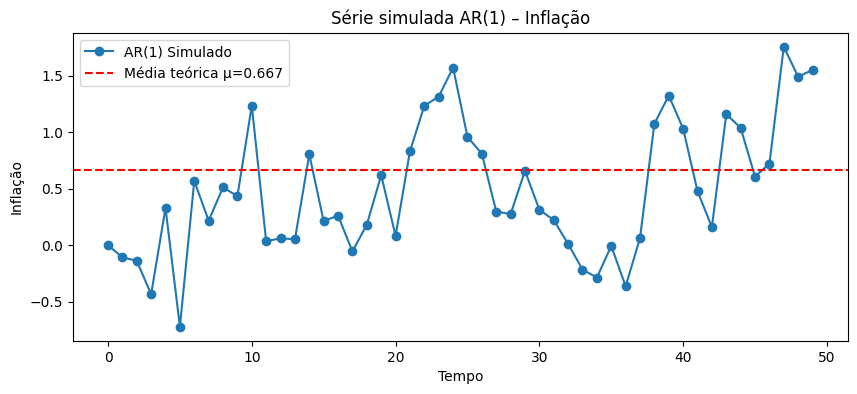

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
c = 0.2
phi = 0.7
sigma = 0.5
n = 50

# Simulação da série AR(1)
np.random.seed(1)
epsilon = np.random.normal(0, sigma, n)
y_ar1 = np.zeros(n)
for t in range(1, n):
    y_ar1[t] = c + phi*y_ar1[t-1] + epsilon[t]

# Média teórica
mu_ar1 = c / (1 - phi)  # 0.667
print("AR(1) – Média teórica:", mu_ar1)

# Variância teórica
var_ar1 = sigma**2 / (1 - phi**2)  # 0.612
print("AR(1) – Variância teórica:", var_ar1)

# Covariâncias teóricas
lags = 5
gamma_ar1 = [var_ar1 * phi**k for k in range(lags+1)]
# γ0 = 0.612, γ1 = 0.428, γ2 = 0.3, γ3 = 0.21, γ4 = 0.147, γ5 = 0.103
print("AR(1) – Covariâncias γ_j:", gamma_ar1)

# Autocorrelações teóricas
rho_ar1 = [g/var_ar1 for g in gamma_ar1]
# ρ1 = 0.7, ρ2 = 0.49, ρ3 = 0.343, ρ4 = 0.2401, ρ5 = 0.16807
print("AR(1) – Autocorrelações ρ_j:", rho_ar1)

# Gráfico da série simulada
plt.figure(figsize=(10,4))
plt.plot(y_ar1, marker='o', label='AR(1) Simulado')
plt.axhline(mu_ar1, color='red', linestyle='--', label='Média teórica μ=0.667')
plt.title("Série simulada AR(1) – Inflação")
plt.xlabel("Tempo")
plt.ylabel("Inflação")
plt.legend()
plt.show()


# AR(2) – PIB Trimestral

AR(2) – Média teórica: 0.5
AR(2) – Covariâncias: γ0 = 0.44444444444444453 , γ1 = 0.31746031746031755 , γ2 = 0.29206349206349214
AR(2) – Autocorrelações: ρ1 = 0.7142857142857143 , ρ2 = 0.6571428571428571


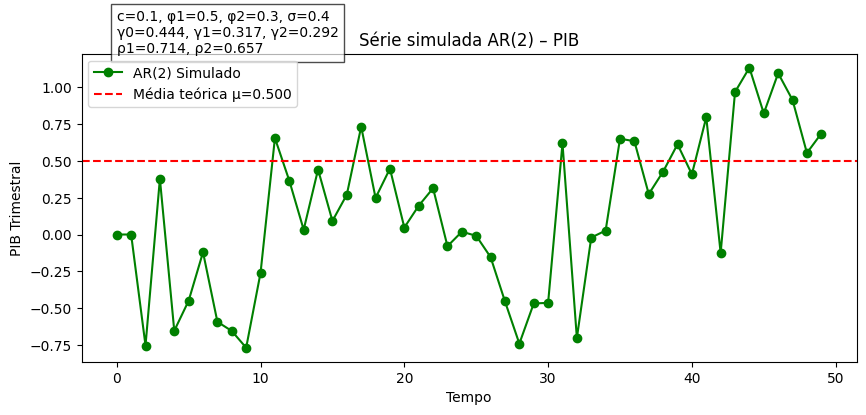

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
c = 0.1
phi1 = 0.5
phi2 = 0.3
sigma = 0.4
n = 50

# Simulação
np.random.seed(2)
epsilon = np.random.normal(0, sigma, n)
y_ar2 = np.zeros(n)
for t in range(2, n):
    y_ar2[t] = c + phi1*y_ar2[t-1] + phi2*y_ar2[t-2] + epsilon[t]

# Média teórica
mu_ar2 = c / (1 - phi1 - phi2)
print("AR(2) – Média teórica:", mu_ar2)

# Covariâncias via Yule-Walker (aproximação simplificada)
gamma0 = sigma**2 / (1 - phi1**2 - phi2*(1+phi2))
gamma1 = phi1*gamma0 / (1 - phi2)
gamma2 = phi1*gamma1 + phi2*gamma0

print("AR(2) – Covariâncias: γ0 =", gamma0, ", γ1 =", gamma1, ", γ2 =", gamma2)

# Autocorrelações
rho1 = gamma1 / gamma0
rho2 = gamma2 / gamma0
print("AR(2) – Autocorrelações: ρ1 =", rho1, ", ρ2 =", rho2)

# Gráfico com parâmetros e valores teóricos
plt.figure(figsize=(10,4))
plt.plot(y_ar2, marker='o', color='green', label='AR(2) Simulado')
plt.axhline(mu_ar2, color='red', linestyle='--', label=f'Média teórica μ={mu_ar2:.3f}')

# Adicionando parâmetros e covariâncias/autocorrelações no gráfico
param_text = (
    f"c={c}, φ1={phi1}, φ2={phi2}, σ={sigma}\n"
    f"γ0={gamma0:.3f}, γ1={gamma1:.3f}, γ2={gamma2:.3f}\n"
    f"ρ1={rho1:.3f}, ρ2={rho2:.3f}"
)
plt.text(0.02, max(y_ar2)+0.1, param_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.title("Série simulada AR(2) – PIB")
plt.xlabel("Tempo")
plt.ylabel("PIB Trimestral")
plt.legend()
plt.show()


# 3️⃣ AR(p) – Taxa de Câmbio Diária (p=3)

AR(p) – Média teórica: 0.0
AR(p) – Covariâncias γ_j: [np.float64(0.10977036098985594), np.float64(0.05703887629614074), np.float64(0.03209442965062785), np.float64(0.025543260438775885)]
AR(p) – Autocorrelações ρ_j: [np.float64(1.0), np.float64(0.5196200120122753), np.float64(0.29237791842183836), np.float64(0.23269724366795494)]


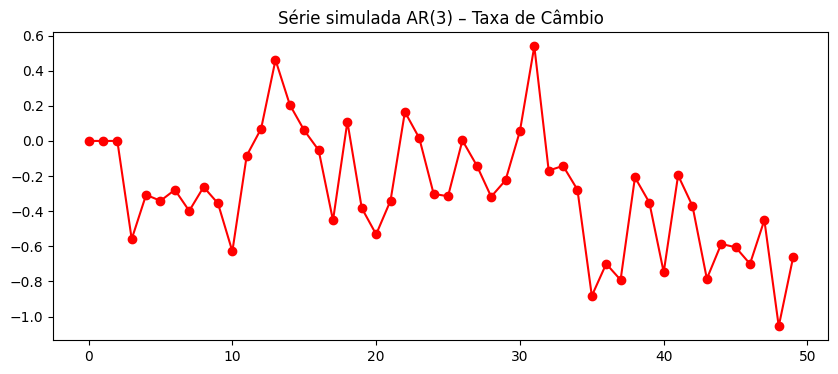

In [ ]:
# Parâmetros
c = 0.0
phi = [0.4, 0.2, 0.1]  # AR(3)
sigma = 0.3
n = 50
p = len(phi)

# Simulação
np.random.seed(3)
epsilon = np.random.normal(0, sigma, n)
y_arp = np.zeros(n)
for t in range(p, n):
    y_arp[t] = c + sum(phi[j]*y_arp[t-j-1] for j in range(p)) + epsilon[t]

# Média teórica
mu_arp = c / (1 - sum(phi))
print("AR(p) – Média teórica:", mu_arp)

# Covariâncias via simulação
y_centered = y_arp - mu_arp
gamma_arp = [np.cov(y_centered[:-k], y_centered[k:])[0,1] if k>0 else np.var(y_centered) for k in range(p+1)]
rho_arp = [g/gamma_arp[0] for g in gamma_arp]

print("AR(p) – Covariâncias γ_j:", gamma_arp)
print("AR(p) – Autocorrelações ρ_j:", rho_arp)

# Gráfico
plt.figure(figsize=(10,4))
plt.plot(y_arp, marker='o', color='red')
plt.title("Série simulada AR(3) – Taxa de Câmbio")
plt.show()


In [ ]:

import yfinance as yf
import pandas as pd

# Baixar dados do IBOVESPA
ibov = yf.download('^BVSP', start='2020-01-01', end='2025-12-31')
ibov = ibov['Close']  # pegamos apenas o preço de fechamento

# Visualizar os primeiros dados
print(ibov.head())


/tmp/ipython-input-1048501656.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibov = yf.download('^BVSP', start='2020-01-01', end='2025-12-31')
[*********************100%***********************]  1 of 1 completed

Ticker         ^BVSP
Date                
2020-01-02  118573.0
2020-01-03  117707.0
2020-01-06  116878.0
2020-01-07  116662.0
2020-01-08  116247.0


Passo 2: Calcular retornos (série estacionária)

Modelos AR assumem estacionaridade. Preços de ações geralmente não são estacionários, então usamos retornos logarítmicos:

In [ ]:
import numpy as np

# Retornos logarítmicos
returns = np.log(ibov / ibov.shift(1)).dropna()
returns.head()


Ticker,^BVSP
Date,
2020-01-03,-0.007330
2020-01-06,-0.007068
2020-01-07,-0.001850
2020-01-08,-0.003564
2020-01-09,-0.002584


Passo 3: Identificar o modelo AR(p)

Você pode usar o autocorrelograma (ACF) e PACF para determinar a ordem
𝑝
p:

<Figure size 1200x500 with 0 Axes>

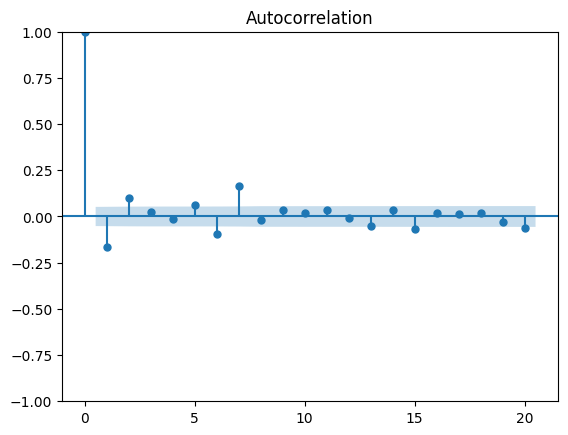

<Figure size 1200x500 with 0 Axes>

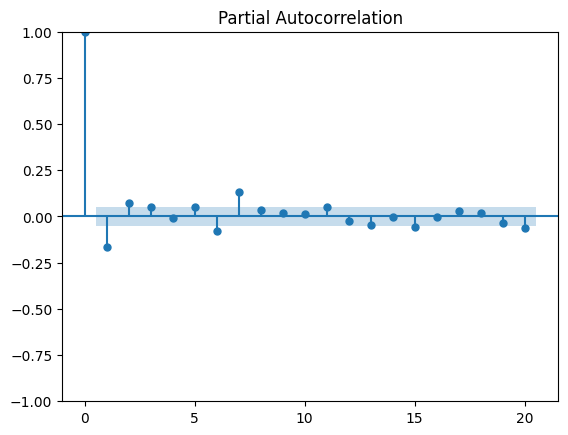

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))
plot_acf(returns, lags=20)
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(returns, lags=20)
plt.show()


ACF: mostra autocorrelações.

PACF: mostra autocorrelações parciais. O corte no PACF ajuda a identificar
𝑝
p para AR(p).



Passo 4: Ajustar o modelo AR

Usando statsmodels.tsa.ar_model.AutoReg:

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Ajustar AR(1)
model = AutoReg(returns, lags=1)
model_fit = model.fit()
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:                  ^BVSP   No. Observations:                 1426
Model:                     AutoReg(1)   Log Likelihood                3915.159
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Wed, 24 Sep 2025   AIC                          -7824.318
Time:                        13:06:35   BIC                          -7808.532
Sample:                             1   HQIC                         -7818.422
                                 1426                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.429      0.668      -0.001       0.001
^BVSP.L1      -0.1635      0.026     -6.257      0.000      -0.215      -0.112
                                    Roots           

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Passo 5: Analisar propriedades do modelo

O objeto model_fit fornece:

In [ ]:
# Coeficientes
print("Constante (c):", model_fit.params[0])
print("Coeficiente AR:", model_fit.params[1:])

# Resíduos
residuals = model_fit.resid

# Autocorrelação dos resíduos
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box)


Constante (c): 0.00017637691142639912
Coeficiente AR: ^BVSP.L1   -0.163514
dtype: float64
      lb_stat     lb_pvalue
10  57.279519  1.181113e-08


/tmp/ipython-input-2803433237.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Constante (c):", model_fit.params[0])


Passo 6: Previsão com o modelo AR

In [ ]:
# Previsão para os próximos 5 dias
forecast = model_fit.predict(start=len(returns), end=len(returns)+4)
print(forecast)


1426   -0.001300
1427    0.000389
1428    0.000113
1429    0.000158
1430    0.000151
dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


/tmp/ipython-input-2277040827.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibov = yf.download('^BVSP', start='2020-01-01', end='2025-12-31')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipython-input-2277040827.py:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  var = float(returns.var())


                            AutoReg Model Results                             
Dep. Variable:                  ^BVSP   No. Observations:                 1426
Model:                     AutoReg(1)   Log Likelihood                3915.159
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Wed, 24 Sep 2025   AIC                          -7824.318
Time:                        13:10:40   BIC                          -7808.532
Sample:                             1   HQIC                         -7818.422
                                 1426                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.429      0.668      -0.001       0.001
^BVSP.L1      -0.1635      0.026     -6.257      0.000      -0.215      -0.112
                                    Roots           

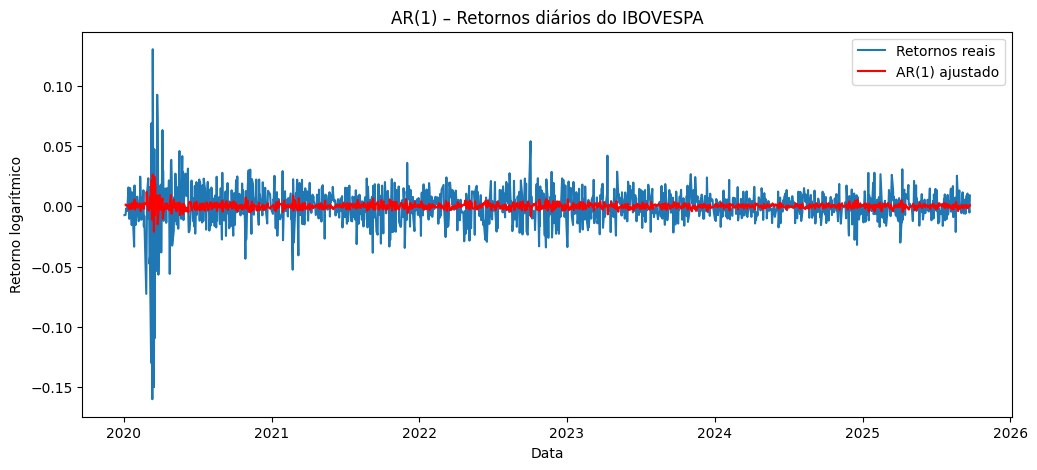

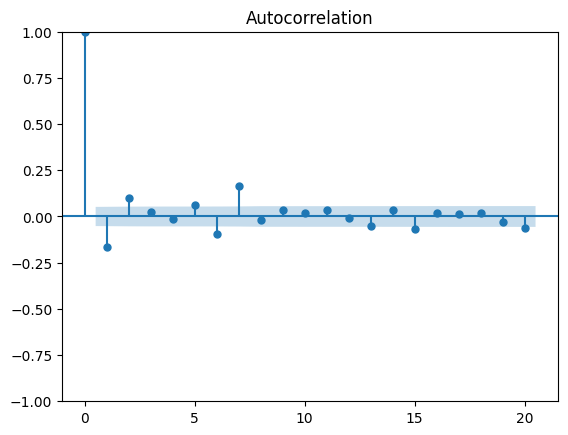

In [ ]:
# Importar bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

# 1. Baixar dados do IBOVESPA
ibov = yf.download('^BVSP', start='2020-01-01', end='2025-12-31')
ibov_close = ibov['Close']

# 2. Calcular retornos logarítmicos (para estacionaridade)
returns = np.log(ibov_close / ibov_close.shift(1)).dropna()

# 3. Ajustar modelo AR(1)
model_ar1 = AutoReg(returns, lags=1)
fit_ar1 = model_ar1.fit()
print(fit_ar1.summary())

# Extrair coeficientes com .iloc
c = fit_ar1.params.iloc[0]
phi = fit_ar1.params.iloc[1]
print(f"Constante c: {c:.5f}, Coef AR(1) phi: {phi:.5f}")

# Média teórica
mu = c / (1 - phi)
print(f"Média teórica: {mu:.5f}")

# Variância amostral
var = float(returns.var())
print(f"Variância amostral: {var:.5f}")


# 6. Calcular covariâncias e autocorrelações teóricas
sigma2 = fit_ar1.sigma2  # variância do ruído
gamma_0 = sigma2 / (1 - phi**2)
lags = 5
gamma = [gamma_0 * phi**k for k in range(lags+1)]
rho = [g / gamma_0 for g in gamma]
print("Covariâncias γ_j:", np.round(gamma,4))
print("Autocorrelações ρ_j:", np.round(rho,4))

# 7. Visualizar série simulada ajustada
plt.figure(figsize=(12,5))
plt.plot(returns, label='Retornos reais')
plt.plot(fit_ar1.fittedvalues, label='AR(1) ajustado', color='red')
plt.title("AR(1) – Retornos diários do IBOVESPA")
plt.xlabel("Data")
plt.ylabel("Retorno logarítmico")
plt.legend()
plt.show()

# 8. ACF para inspeção visual
plot_acf(returns, lags=20)
plt.show()
